In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv('supermarket_sales.csv')

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales_data.isna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
sales_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Perform Exploratory Data Analysis (EDA)

Best-Selling Products
Group the data by the Product line column and sum up the Total column to find the sales per product line.

In [8]:
product_sales = sales_data.groupby('Product line')['Total'].sum().reset_index()
print(product_sales.sort_values(by='Total', ascending=False))


             Product line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


Busiest Hours
Extract the hour from the Time column and count the number of transactions for each hour.

In [9]:
sales_data['Hour'] = pd.to_datetime(sales_data['Time']).dt.hour
busiest_hours = sales_data.groupby('Hour')['Invoice ID'].count().reset_index()
print(busiest_hours.sort_values(by='Invoice ID', ascending=False))


    Hour  Invoice ID
9     19         113
3     13         103
5     15         102
0     10         101
8     18          93
1     11          90
2     12          89
4     14          83
6     16          77
10    20          75
7     17          74


C:\Users\rupes\AppData\Local\Temp\ipykernel_2324\3284374097.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Hour'] = pd.to_datetime(sales_data['Time']).dt.hour


Most Profitable Branches
Group by Branch and sum up the Total column to calculate the total revenue for each branch.

In [16]:
branch_sales = sales_data.groupby('Branch')['Total'].sum().reset_index()
print(branch_sales.sort_values(by='Total', ascending=False))


  Branch        Total
2      C  110568.7065
0      A  106200.3705
1      B  106197.6720


Total Sales by Branch (GROUP BY)

In [26]:
total_sales_branch = sales_data.groupby('Branch')['Total'].sum()
print(total_sales_branch)

Sum_branch_total = total_sales_branch.sum()
print(Sum_branch_total)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
322966.749


Average Purchase Amount per Customer (HAVING equivalent)

In [12]:
avg_purchase_customer = sales_data.groupby('Customer type')['Total'].mean()
print(avg_purchase_customer)


Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


In [33]:
# City-wise sales for members and non-members
citywise_sales = sales_data.groupby(['City', 'Customer type'])['Total'].sum().unstack()
print(citywise_sales)


Customer type      Member     Normal
City                                
Mandalay       53704.6860  52492.986
Naypyitaw      56881.2825  53687.424
Yangon         53637.4755  52562.895


In [35]:
# Sales by payment method
payment_sales = sales_data.groupby('Payment')['Total'].sum()
print(payment_sales)


Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


Nested Query to Find Branches with Above-Average Revenue
First, calculate the overall average revenue.
Then, filter branches with revenue above this average

In [13]:
average_revenue = sales_data['Total'].mean()
above_avg_revenue_branches = sales_data.groupby('Branch')['Total'].sum().reset_index()
above_avg_revenue_branches = above_avg_revenue_branches[above_avg_revenue_branches['Total'] > average_revenue]
print(above_avg_revenue_branches)


  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


Visualizations

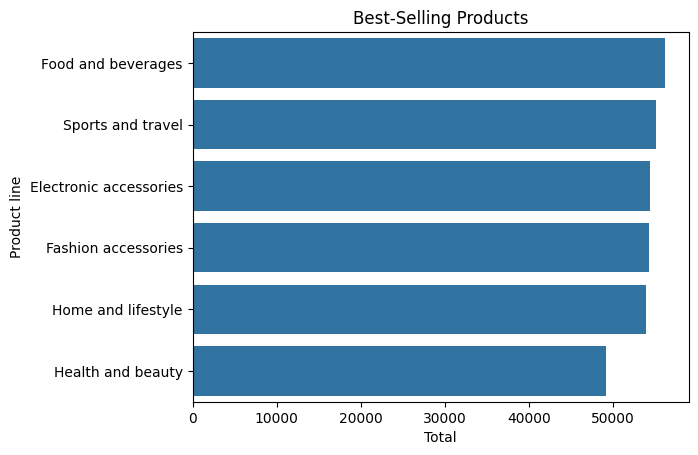

In [21]:
sns.barplot(x='Total', y='Product line', data=product_sales.sort_values(by='Total', ascending=False))
plt.title('Best-Selling Products')
plt.show()

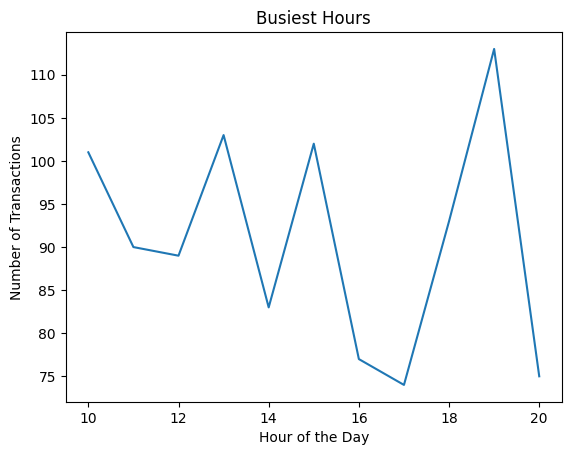

In [22]:
sns.lineplot(x='Hour', y='Invoice ID', data=busiest_hours)
plt.title('Busiest Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


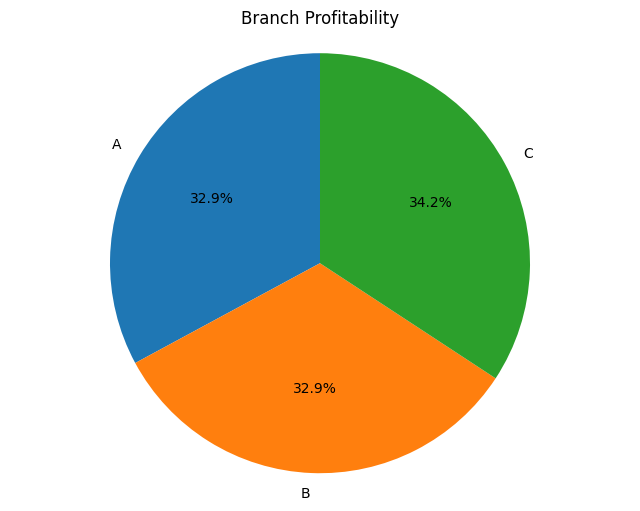

In [30]:
# Extract branch names and corresponding total sales
labels = total_sales_branch.index  # Branch names (A, B, C)
sizes = total_sales_branch.values  # Total sales (float values)

# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Branch Profitability')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

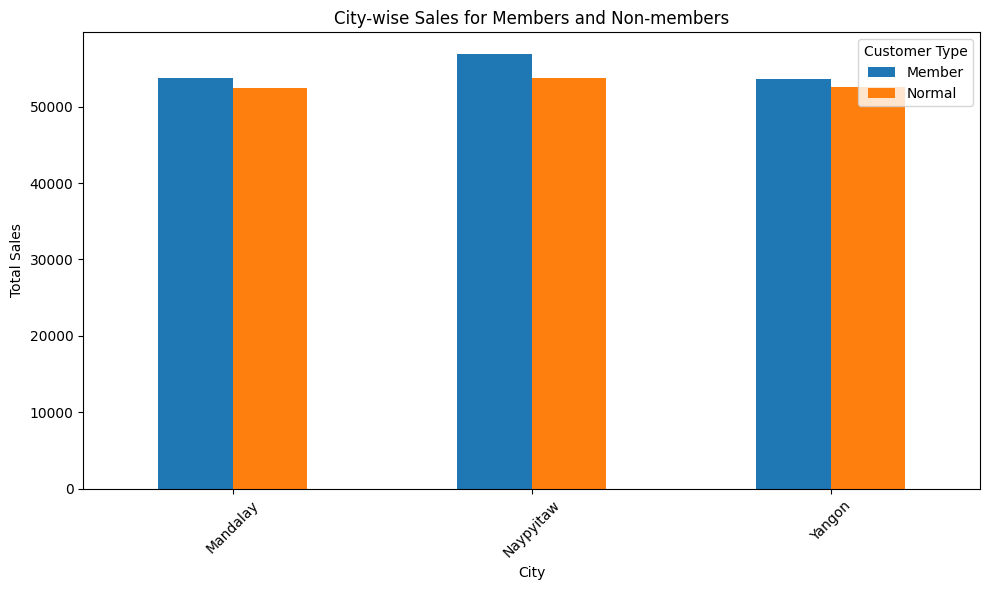

In [32]:
# Bar plot for city-wise sales of members and non-members
citywise_sales.plot(kind='bar', figsize=(10, 6))
plt.title('City-wise Sales for Members and Non-members')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


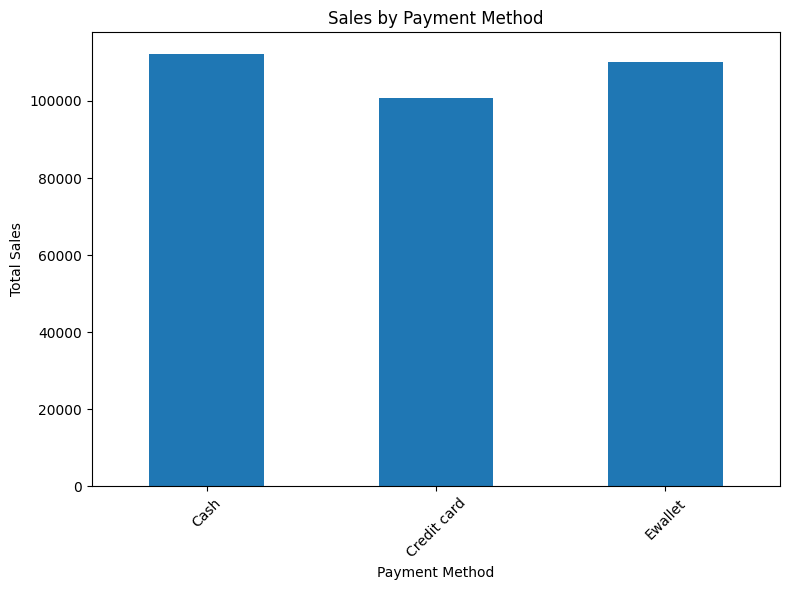

In [39]:
# Bar plot for payment method sales
payment_sales.plot(kind='bar', figsize=(8, 6))
plt.title('Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
